# Question 1

Explain SparkSession and SparkContext and their importance:

SparkContext:
-	is an entry point to Spark, and it is used to programmatically create RDD accumulators and broadcast variables on the cluster.
-	Connection to a Spark cluster.
-	The `sc` is the default object available in spark-shell and can be programmatically created using SparkContext class.
-	It’s used to create RDDs and performs low level operations on them.
-	Most of the operations/methods or functions used in Spark comes from SparkContext for example accumluators, broadcast variables, parallelize.

SparkSession:
-	New entry point to underlying Spark functionality to programmatically create RDD, DataFrame and DataSet. Contrary to SparkContext, it performs higher level operations/functionalities on the above examples.
-	It provides a more user-friendly API in comparison to SparkContext.
-	you can integrate SparkContext, SQL Context, Streaming Context, Hive Context, NoSQL databases, and different files formats etc.
-  All of the APIs accessible in those contexts are likewise available in SparkSession, and SparkSession includes a SparkContext for real computation.
-	it also supports SQL language allowing you to perform SQL queries on Datasets and DataFrames.

Both tools are essential for processing and analyzing large data using Apache Spark. Very important tools for the Apache Spark development community.



# Setting up PySpark enviorement in Colab

In [ ]:
!pip install pyspark py4j

# Question 2

Import the data from employees.json file using JSON python library.

The code `data = list(map(json.loads, f))` was used to avoid getting the following error: JSONDecodeError: Extra data: line 2 column 1 (char 34).

In [2]:
import json

with open('employees.json') as f:
    data = list(map(json.loads, f))

print(data)

[{'name': 'Michael', 'salary': 3000}, {'name': 'Andy', 'salary': 4500}, {'name': 'Justin', 'salary': 3500}, {'name': 'Berta', 'salary': 4000}]


# Question 3

Import employees.json file using HiveContext or sqlContext into a DataFrame. Print schema of the json file.

Importing data using regular `Spark Session`.

In [3]:
from pyspark.sql import SparkSession

In [4]:
sparkDF = SparkSession.builder.appName('DataFrame').getOrCreate()

In [5]:
df = sparkDF.read.json('employees.json')
df.show(truncate = False)

+-------+------+
|name   |salary|
+-------+------+
|Michael|3000  |
|Andy   |4500  |
|Justin |3500  |
|Berta  |4000  |
+-------+------+



In [6]:
df.printSchema()

root
 |-- name: string (nullable = true)
 |-- salary: long (nullable = true)



Using `HiveContext` to import the file:

In [7]:
spark_Hive = SparkSession.builder.appName('Hive DataFrame').enableHiveSupport().getOrCreate()

# Read the JSON file into a DataFrame
df1 = spark_Hive.read.json('employees.json')

# Print the DataFrame
df1.show(truncate=False)

+-------+------+
|name   |salary|
+-------+------+
|Michael|3000  |
|Andy   |4500  |
|Justin |3500  |
|Berta  |4000  |
+-------+------+



In [8]:
df1.printSchema()

root
 |-- name: string (nullable = true)
 |-- salary: long (nullable = true)



## 3.a

Next register the dataframe as a `temporary table` and show the contents of the table.

In [37]:
#from pyspark.sql import SparkSession

In [9]:
spark_temp = SparkSession.builder.appName('Temporary Table').getOrCreate()
df_temp = spark_temp.read.json('employees.json')

In [10]:
df_temp.createOrReplaceTempView('employees_temp')

In [11]:
# Checking if temporary table exists or not
table_exists = spark_temp.catalog.tableExists('employees_temp')

if table_exists:
    print('employees_temp exists')
else:
    print('employees_temp does not exist')

employees_temp exists


In [12]:
# Basic SQL Syntax
spark_temp.sql('SELECT * FROM employees_temp').show() # Selecting all records from employees_temp using *

+-------+------+
|   name|salary|
+-------+------+
|Michael|  3000|
|   Andy|  4500|
| Justin|  3500|
|  Berta|  4000|
+-------+------+



## 3.b

Display the names of the employee by ordering the salary from highest to lowest from the employees.json file in by firing a SQL query on the temporary table created.

In [13]:
# Basic SQL Syntax
spark_temp.sql('SELECT name FROM employees_temp ORDER BY salary DESC').show()

+-------+
|   name|
+-------+
|   Andy|
|  Berta|
| Justin|
|Michael|
+-------+



If we want to also see the displayed salary, we can do it using the following code:

In [14]:
spark_temp.sql('SELECT name, salary FROM employees_temp ORDER BY salary DESC').show()

+-------+------+
|   name|salary|
+-------+------+
|   Andy|  4500|
|  Berta|  4000|
| Justin|  3500|
|Michael|  3000|
+-------+------+



# Question 4

Import file people.txt located at the same location as employees.json into a rdd using built-in CSV library.

StackOverflow example -> If you narcoticsCrimes.flatMap(lambda x: x.split(",")), then all the values will be separated.

In [20]:
sc = sparkDF.sparkContext # calling existing session and creating object sc

# Reading text file into RDD using sc.textFile()
RDD = sc.textFile('people.txt').map(lambda line: line.split(','))

# Print the RDD
# pyspark.RDD.collect() will return a list that contains all the elements in this RDD
# i -> row
for i in RDD.collect():
    print(i)

['Michael', ' 29']
['Andy', ' 30']
['Justin', ' 19']


# Question 5

Elaborate the advantages / disadvantages of importing the data using HiveContext or sqlContext and rdd into spark . Make use of above examples if necessary.

`HiveContext`

Hive Advantages:
-	HiveContext in PySpark provides powerful SQL-like interface for working with data stored in Hive. This is beneficial to individuals who use SQL in a daily basis without having to learn complex concepts.
-	Allows you to easily query and analyze large datasets, and it provides a way to write data back to Hive tables.
-	HiveContext is used by spark to enhance the query parsing and accessing to existing Hive tables, and even to persist your result DataFrames / Tables.
-	Hive Metastore integratation. This metastore contains all the metadata about the data and tables in the EMR cluster, which allows for easy data analysis.
-	Hive provides a more robust SQL parser.

Examples SQL_Like Interface:

`sc = pyspark.SparkContext(conf=conf).getOrCreate()`

`sqlContext = HiveContext(sc)`

`sqlContext.sql ('select * from table')`


Hive Disadvantages:
-	HiveContext does not offer real-time queries (It was design for batch processing). The batch behavior is that all inputs must be ready by map before the reduce job starts, which makes MapReduce unsuitable for online and stream processing use cases.
-	Compared to relational databases, it does provide limited subquery support.
-	It is not designed for the Online transaction processing (read/write operations on individual records).
-	Has very high latency (longer delays) due to the batch processing nature.


`RDD`

RDD Advantages:
-	RDDs track data lineage information to recover lost data, automatically on failure (fault tolerance).
-	RDD can handle structured and unstructured data easily and effectively.
-	It offers a lot of flexibility thanks to operators such as map, reduce, and shuffle. These operators allow us to perform different transformations against our data. 
-	The above operators also offer a lot of performance that might be better than other high-level APIs.
-	Even though it can handle both data structures, RDD is preferable on unstructured data, to be used for low-level transformations and actions.


RDD Disadvantages:
-	Data does not get loaded in an RDD even if you define it. Transformations are computed when you call action, such as count or collect, or save the output to a file system.
-	Data stored in an RDD is in the read-only mode, you cannot edit the data which is present in the RDD.
-	RDDs are slow (specifally within PySpark) because whenever a PySpark program is executed using RDDs, there is a potentially large overhead to execute the job. 
-	RDD does not know the information of the stored data, so the structure of the data is a black box which requires a user to write a very specific aggregation function to complete an execution. 
-	The above RDDs operators cannot be re-used. 
-	RDDs take a lot of time to master, and we can potentially right inefficiently code.




`Extra information regarding RDDs performance`

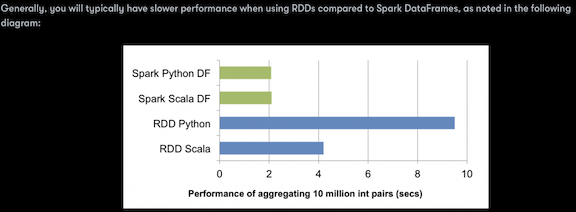

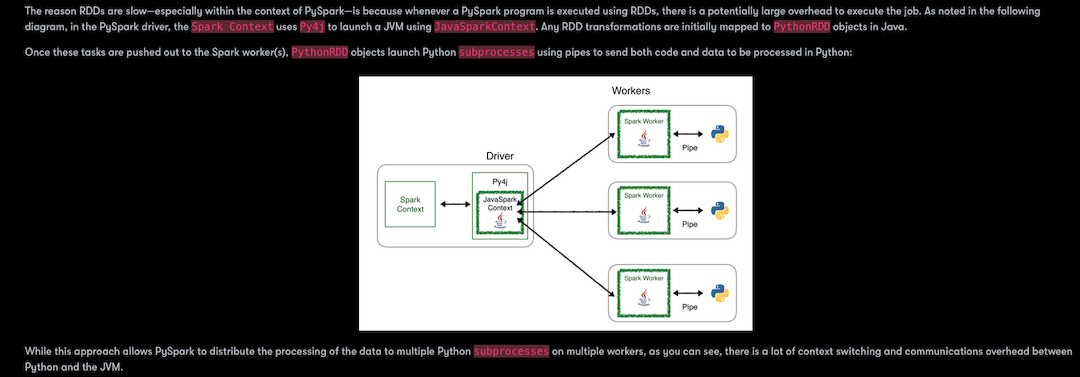

# References:

- Context vs Session: https://www.ksolves.com/blog/big-data/spark/sparksession-vs-sparkcontext-what-are-the-differences#:~:text=In%20earlier%20versions%20of%20Spark,programming%20with%20DataFrame%20and%20Dataset.

- Context vs Session: https://sparkbyexamples.com/spark/sparksession-vs-sparkcontext/

- Loading Json https://www.programiz.com/python-programming/json

- Hive enable: https://sparkbyexamples.com/pyspark/pyspark-what-is-sparksession/

- Temp table: https://sparkbyexamples.com/spark/spark-createorreplacetempview-explained/

- Checking for temporary table: https://stackoverflow.com/questions/58067388/how-to-check-if-a-hive-table-exists-using-pyspark

- Reading text file into RDD: https://sparkbyexamples.com/spark/spark-read-text-file-rdd-dataframe/

- Splitting each line into lists: https://stackoverflow.com/questions/42408405/what-does-this-anonymmous-split-function-do

- RDD.collect(): https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.RDD.collect.html

Adavantages/Disadvantages HiveConetxt:
- http://www.freshers.in/article/spark/pyspark-hivecontext-in-pyspark-a-brief-explanation/

- https://stackoverflow.com/questions/36188516/spark-sql-query-execution-on-hive

- https://aws.amazon.com/big-data/what-is-hive/#:~:text=The%20Hive%20metastore%20contains%20all,in%20the%20S3%20data%20lake.

- https://stackoverflow.com/questions/33666545/what-is-the-difference-between-apache-spark-sqlcontext-vs-hivecontext

- https://subscription.packtpub.com/book/web-development/9781783558575/1/ch01lvl1sec11/batch-real-time-and-stream-processing

- https://stackoverflow.com/questions/51940744/hivecontext-vs-spark-sql

RDD Advantages/Disadvantages:

- https://intellipaat.com/blog/tutorial/spark-tutorial/programming-with-rdds/?US

- https://subscription.packtpub.com/book/data/9781788835367/2/ch02lvl1sec25/pitfalls-of-using-rdds

- https://www.wisewithdata.com/2020/05/rdds-vs-dataframes-vs-datasets-the-three-data-structures-of-spark/#:~:text=RDD%20can%20handle%20structured%20and,operators%20cannot%20be%20re%2Dused.
